In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
ruta = "../../results/WHCd_Juarez_clean_v1.csv"
dataML = pd.read_csv(ruta)
dataML.head()

,tiempo_americano,time_num_usa,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,...,pm_nivel_del_mar,evap_potencial,tip_precipitacion,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,dir_viento,vel_viento
0,1/1/2000,36526,-1.669281,-0.020920,7.480493,17.317834,1907.450439,-7.220000e-06,2.148321,-2.000000e-06,...,1012.635625,-1.250000e-05,0,13.064264,0.137127,0.152496,0.0,89,este,1.669412
1,1/1/2000,36526,-1.951294,-0.468689,8.055566,16.767297,2135.849121,-1.550000e-06,2.747254,-4.300000e-07,...,1012.456250,-6.860000e-07,0,12.453210,0.137084,0.236725,0.0,76,este,2.006793
2,1/1/2000,36526,-1.763443,-0.294388,5.953119,14.243799,2208.853027,-4.540000e-07,2.561296,-1.230000e-07,...,1012.368125,6.660000e-07,0,10.392664,0.137066,0.579987,0.0,81,este,1.787847
3,1/1/2000,36526,-1.436081,0.382751,5.892938,11.471796,7484.599609,3.110000e-07,2.200583,8.660000e-08,...,1012.543125,1.220000e-06,0,8.273584,0.137028,0.482239,0.0,105,este,1.486212
4,1/1/2000,36526,-0.908798,1.725983,5.761438,11.316980,4100.225235,6.010000e-07,2.526732,1.660000e-07,...,1012.673750,1.130000e-06,0,7.544336,0.137005,0.411499,0.0,152,sureste,1.950623


In [3]:
# Seleccionar las variables independientes (x) y la variable dependiente (y)
X = dataML[['time_num_usa']]
y = dataML[['viento_U', 'viento_V', 'pto_rocio', 'tem_viento', 'alt_nube', 'evaporacion', 'rafaga_viento', 'evap_media', 'evap_media_potencial', 'pm_nivel_del_mar',
            'evap_potencial', 'tip_precipitacion', 'temp_del_suelo', 'agua_del_suelo', 'nubosidad', 'precip_acum_x_hora', 'angulo_viento','vel_viento']]

In [4]:
# Dividir los datos en conjunto de entrenemineto y conjunto de pruebas
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Crear el modelo de regresion lineal multiple
reg_lineal_mul = LinearRegression().fit(X_entrenamiento, y_entrenamiento)

In [6]:
# Hacer predicciones sobre el conjunto de prueba
y_prediccion = reg_lineal_mul.predict(X_test)

In [7]:
error_cuad_metrico = mean_squared_error(y_test, y_prediccion)
print("Error cuadrado medio: ", error_cuad_metrico)

Error cuadrado medio:  200539.11451436207


In [8]:
# Imprimir los coeficientes y el sesgo
# Valores de los pesos del modelo de regresion
print("Coeficientes: ", reg_lineal_mul)
print("Sesgo (Coeficiente W0): ", reg_lineal_mul.intercept_)
print("Coeficiente W1: ", reg_lineal_mul.coef_[0])
print("Coeficiente W2: ", reg_lineal_mul.coef_[1])

Coeficientes:  LinearRegression()
Sesgo (Coeficiente W0):  [-1.80430297e-01  1.04214680e-01 -2.14129278e+00  1.11508938e+01
  3.53949156e+03 -1.85032545e-05  5.69581728e+00 -5.13964451e-06
 -4.21870229e-05  1.01521800e+03 -1.51878236e-04  1.32540632e-01
  1.34427426e+01  6.32645883e-02  2.03652689e-01  2.50804413e-02
  1.84600412e+02  2.68487961e+00]
Coeficiente W1:  [1.35267956e-05]
Coeficiente W2:  [9.88145692e-06]


In [9]:
#Imprimir el coeficiente de deterinacion
print("Coeficiente de determinacion: ",reg_lineal_mul.score(X_entrenamiento,y_entrenamiento))

Coeficiente de determinacion:  0.00040034354970116783


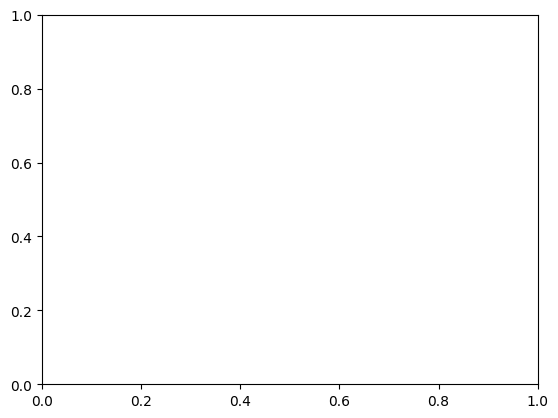

In [10]:
#Crear una figura y un eje
fig, ax=plt.subplots()

In [11]:
#Graficar los puntos de entrenamiento
ax.scatter(X_entrenamiento['time_num_usa'],y_entrenamiento,color='blue', label='Entrenamiento')

ValueError: x and y must be the same size

In [ ]:
#Graficar los puentos de prueba
ax.scatter(X_test['time_num_usa'])

TypeError: Axes.scatter() missing 1 required positional argument: 'y'

In [ ]:
#Graficar la recta de regresion
ax.plot(y_test['time_num_usa'], y_prediccion,
        color='black', linewidth=2, label='Regresión')

In [ ]:
#Agregar etiquetas al eje X e Y
ax.set_ylabel('Temperatura del viento')
ax.set_xlabel('Fecha')

In [ ]:
#agrefar un titulo al grafico
ax.set_title("Regresion lineal multiple")

In [ ]:
# Mostrar la leyenda
ax.legend()

In [ ]:
# Mostrar grafico
plt.show()